In [452]:
from salishsea_tools import viz_tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import cmocean.cm as cm
import glob

## Global definitions to use

In [453]:
year = 2018

# Look at gauged rivers

In [454]:
def read_gauged(fname):
    path = '../../../../../../results/forcing/rivers/observations/' + fname

    riv_df = pd.read_csv(path,header=None,delimiter=' ')
    mapping = {riv_df.columns[0]: 'YYYY', riv_df.columns[1]: 'MM', riv_df.columns[2]: 'DD', riv_df.columns[3]: 'DISCHARGE'}
    riv = riv_df.rename(columns=mapping)
    riv_cols = riv.drop(columns=4)

    riv_cols['DateTime'] = pd.to_datetime(dict(year=riv_cols['YYYY'], month=riv_cols['MM'], day=riv_cols['DD']))

    return riv_cols

In [455]:
Nisqually = read_gauged('Nisqually_McKenna_flow')
Squamish = read_gauged('Squamish_Brackendale_flow')
Snohomish = read_gauged('Snohomish_Monroe_flow')
Skagit = read_gauged('Skagit_MountVernon_flow')
Cowichan = pd.read_csv('CowichanDuncan.csv',header=1)
Cowichan = Cowichan[Cowichan['PARAM'] == 1]
Cowichan_Lake = pd.read_csv('CowichanLake.csv',header=1)
Cowichan_Lake = Cowichan_Lake[Cowichan_Lake['PARAM'] == 1]
Fraser = pd.read_csv('Fraser_Hope.csv',header=1)
Fraser = Fraser[Fraser['PARAM'] == 1]
# Elwha = pd.read_csv('ElwhaMcdonald.csv',header=1)

In [456]:
Elwha = pd.read_csv('ElwhaMcdonald.csv',header=29)
Elwha.head(4)

,5s\t15s\t20d\t14n\t10s,Unnamed: 1
0,USGS\t12045500\t1989-05-01\t1650\tA,NaN
1,USGS\t12045500\t1989-05-02\t2420\tA,NaN
2,USGS\t12045500\t1989-05-03\t1660\tA,NaN
3,USGS\t12045500\t1989-05-04\t2160\tA,NaN


In [457]:
Elwha[['agency_cd', 'site_no', 'DATETIME', 'discharge', 'qc']] = Elwha['5s\t15s\t20d\t14n\t10s'].str.split('\t', expand=True)
Elwha['discharge'] = pd.to_numeric(Elwha['discharge'])
Elwha[['YYYY', 'MM', 'DD']] = Elwha['DATETIME'].str.split('-', expand=True)
Elwha['DATETIME'] = pd.to_datetime(Elwha['DATETIME'])
Elwha['DISCHARGE'] = Elwha['discharge']*1/35.3147
Elwha.head(4)

,5s\t15s\t20d\t14n\t10s,Unnamed: 1,agency_cd,site_no,DATETIME,discharge,qc,YYYY,MM,DD,DISCHARGE
0,USGS\t12045500\t1989-05-01\t1650\tA,NaN,USGS,12045500,1989-05-01,1650,A,1989,05,01,46.722753
1,USGS\t12045500\t1989-05-02\t2420\tA,NaN,USGS,12045500,1989-05-02,2420,A,1989,05,02,68.526704
2,USGS\t12045500\t1989-05-03\t1660\tA,NaN,USGS,12045500,1989-05-03,1660,A,1989,05,03,47.005921
3,USGS\t12045500\t1989-05-04\t2160\tA,NaN,USGS,12045500,1989-05-04,2160,A,1989,05,04,61.164331


In [458]:
Nooksack = pd.read_csv('NooksackFerndale.csv',header=31)
Nooksack.head(4)

,5s\t15s\t20d\t14n\t10s
0,USGS\t12213100\t1966-10-01\t1180\tA
1,USGS\t12213100\t1966-10-02\t1950\tA
2,USGS\t12213100\t1966-10-03\t1500\tA
3,USGS\t12213100\t1966-10-04\t1280\tA


In [459]:
Nooksack[['agency_cd', 'site_no', 'DATETIME', 'discharge', 'qc']] = Nooksack['5s\t15s\t20d\t14n\t10s'].str.split('\t', expand=True)
Nooksack = Nooksack[Nooksack['discharge'] != 'Ice']
Nooksack['discharge'] = pd.to_numeric(Nooksack['discharge'])
Nooksack[['YYYY', 'MM', 'DD']] = Nooksack['DATETIME'].str.split('-', expand=True)
Nooksack['DATETIME'] = pd.to_datetime(Nooksack['DATETIME'])
Nooksack['DISCHARGE'] = Nooksack['discharge']*1/35.3147
Nooksack.head(4)

,5s\t15s\t20d\t14n\t10s,agency_cd,site_no,DATETIME,discharge,qc,YYYY,MM,DD,DISCHARGE
0,USGS\t12213100\t1966-10-01\t1180\tA,USGS,12213100,1966-10-01,1180.0,A,1966,10,01,33.413847
1,USGS\t12213100\t1966-10-02\t1950\tA,USGS,12213100,1966-10-02,1950.0,A,1966,10,02,55.217799
2,USGS\t12213100\t1966-10-03\t1500\tA,USGS,12213100,1966-10-03,1500.0,A,1966,10,03,42.475230
3,USGS\t12213100\t1966-10-04\t1280\tA,USGS,12213100,1966-10-04,1280.0,A,1966,10,04,36.245529


In [460]:
# Cowichan_Lake.head()

In [461]:
# test = Cowichan[['YEAR','DD','Jan']]
# mapping = {test.columns[0]: 'YYYY', test.columns[2]: 'DISCHARGE'}
# test2 = test.rename(columns=mapping)
# test2['MM'] = 1

def wrangle_df(river_dataframe, month, month_num, month_days):
    test = river_dataframe[['YEAR','DD', month]]
    mapping = {test.columns[0]: 'YYYY', test.columns[2]: 'DISCHARGE'}
    test2 = test.rename(columns=mapping)
    test2['MM'] = month_num
    test2 = test2.drop(test2[test2['DD'] > month_days].index)
    return test2

January = wrangle_df(Cowichan, 'Jan', 1, 31)
February = wrangle_df(Cowichan, 'Feb', 2, 28)
March = wrangle_df(Cowichan, 'Mar', 3, 31)
April = wrangle_df(Cowichan, 'Apr', 4, 30)
May = wrangle_df(Cowichan, 'May', 5, 31)
June = wrangle_df(Cowichan, 'Jun', 6, 30)
July = wrangle_df(Cowichan, 'Jul', 7, 31)
August = wrangle_df(Cowichan, 'Aug', 8, 31)
September = wrangle_df(Cowichan, 'Sep', 9, 30)
October = wrangle_df(Cowichan, 'Oct', 10, 31)
November = wrangle_df(Cowichan, 'Nov', 11, 30)
December = wrangle_df(Cowichan, 'Dec', 12, 31)

Cowichan = pd.DataFrame(np.vstack((January.to_numpy(), February.to_numpy(), March.to_numpy(), April.to_numpy(), May.to_numpy(), June.to_numpy(), July.to_numpy(), August.to_numpy(), September.to_numpy(), October.to_numpy(), November.to_numpy(), December.to_numpy())), columns= ['YYYY', 'DD', 'DISCHARGE', 'MM'])


In [462]:
January = wrangle_df(Fraser, 'Jan', 1, 31)
February = wrangle_df(Fraser, 'Feb', 2, 28)
March = wrangle_df(Fraser, 'Mar', 3, 31)
April = wrangle_df(Fraser, 'Apr', 4, 30)
May = wrangle_df(Fraser, 'May', 5, 31)
June = wrangle_df(Fraser, 'Jun', 6, 30)
July = wrangle_df(Fraser, 'Jul', 7, 31)
August = wrangle_df(Fraser, 'Aug', 8, 31)
September = wrangle_df(Fraser, 'Sep', 9, 30)
October = wrangle_df(Fraser, 'Oct', 10, 31)
November = wrangle_df(Fraser, 'Nov', 11, 30)
December = wrangle_df(Fraser, 'Dec', 12, 31)

Fraser = pd.DataFrame(np.vstack((January.to_numpy(), February.to_numpy(), March.to_numpy(), April.to_numpy(), May.to_numpy(), June.to_numpy(), July.to_numpy(), August.to_numpy(), September.to_numpy(), October.to_numpy(), November.to_numpy(), December.to_numpy())), columns= ['YYYY', 'DD', 'DISCHARGE', 'MM'])

In [463]:
January = wrangle_df(Cowichan_Lake, 'Jan', 1, 31)
February = wrangle_df(Cowichan_Lake, 'Feb', 2, 28)
March = wrangle_df(Cowichan_Lake, 'Mar', 3, 31)
April = wrangle_df(Cowichan_Lake, 'Apr', 4, 30)
May = wrangle_df(Cowichan_Lake, 'May', 5, 31)
June = wrangle_df(Cowichan_Lake, 'Jun', 6, 30)
July = wrangle_df(Cowichan_Lake, 'Jul', 7, 31)
August = wrangle_df(Cowichan_Lake, 'Aug', 8, 31)
September = wrangle_df(Cowichan_Lake, 'Sep', 9, 30)
October = wrangle_df(Cowichan_Lake, 'Oct', 10, 31)
November = wrangle_df(Cowichan_Lake, 'Nov', 11, 30)
December = wrangle_df(Cowichan_Lake, 'Dec', 12, 31)

Cowichan_Lake = pd.DataFrame(np.vstack((January.to_numpy(), February.to_numpy(), March.to_numpy(), April.to_numpy(), May.to_numpy(), June.to_numpy(), July.to_numpy(), August.to_numpy(), September.to_numpy(), October.to_numpy(), November.to_numpy(), December.to_numpy())), columns= ['YYYY', 'DD', 'DISCHARGE', 'MM'])

In [464]:
## need to add month here? so that i can sort by both

# pd.DataFrame(np.vstack((Cowichan[['YEAR','Jan']].to_numpy(), Cowichan[['YEAR','Feb']].to_numpy(), Cowichan[['YEAR','Mar']].to_numpy(), Cowichan[['YEAR','Apr']].to_numpy(), Cowichan[['YEAR','May']].to_numpy(), Cowichan[['YEAR','Jun']].to_numpy(), Cowichan[['YEAR','Jul']].to_numpy(), Cowichan[['YEAR','Aug']].to_numpy(), Cowichan[['YEAR','Sep']].to_numpy(), Cowichan[['YEAR','Oct']].to_numpy(), Cowichan[['YEAR','Nov']].to_numpy(), Cowichan[['YEAR','Dec']].to_numpy())), columns= ['YEAR', 'DISCHARGE'])

In [465]:
riv_df = pd.read_csv('../../../../../../results/forcing/rivers/observations/Homathko_Mouth_flow',header=None,delimiter=' ')
mapping = {riv_df.columns[0]: 'YYYY', riv_df.columns[1]: 'MM', riv_df.columns[2]: 'DD', riv_df.columns[3]: 'DISCHARGE'}
Homathko = riv_df.rename(columns=mapping)
Homathko['DateTime'] = pd.to_datetime(dict(year=Homathko['YYYY'], month=Homathko['MM'], day=Homathko['DD']))

In [466]:
riv_df = pd.read_csv('../../../../../../results/forcing/rivers/observations/Salmon_Sayward_flow',header=None,delimiter=' ')
mapping = {riv_df.columns[0]: 'YYYY', riv_df.columns[1]: 'MM', riv_df.columns[2]: 'DD', riv_df.columns[3]: 'DISCHARGE'}
Salmon = riv_df.rename(columns=mapping)
Salmon['DateTime'] = pd.to_datetime(dict(year=Salmon['YYYY'], month=Salmon['MM'], day=Salmon['DD']))

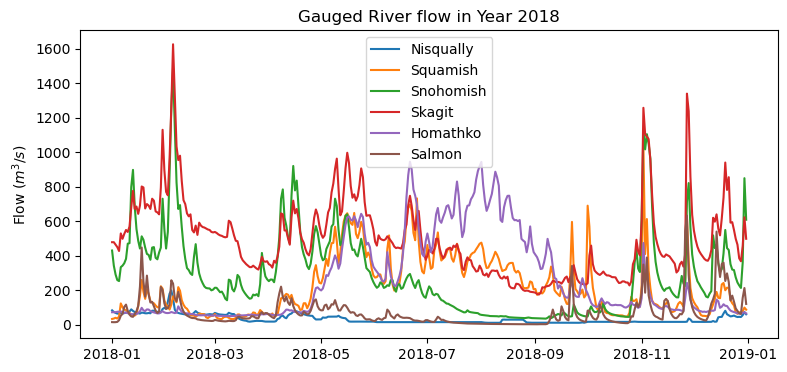

In [467]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(Nisqually[Nisqually['YYYY'] == year]['DateTime'], Nisqually[Nisqually['YYYY'] == year]['DISCHARGE'], label='Nisqually')
ax.plot(Squamish[Squamish['YYYY'] == year]['DateTime'], Squamish[Squamish['YYYY'] == year]['DISCHARGE'], label='Squamish')
ax.plot(Snohomish[Snohomish['YYYY'] == year]['DateTime'], Snohomish[Snohomish['YYYY'] == year]['DISCHARGE'], label='Snohomish')
ax.plot(Skagit[Skagit['YYYY'] == year]['DateTime'], Skagit[Skagit['YYYY'] == year]['DISCHARGE'], label='Skagit')
ax.plot(Homathko[Homathko['YYYY'] == year]['DateTime'], Homathko[Homathko['YYYY'] == year]['DISCHARGE'], label='Homathko')
ax.plot(Salmon[Salmon['YYYY'] == year]['DateTime'], Salmon[Salmon['YYYY'] == year]['DISCHARGE'], label='Salmon')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Gauged River flow in Year ' + str(year))

plt.legend()

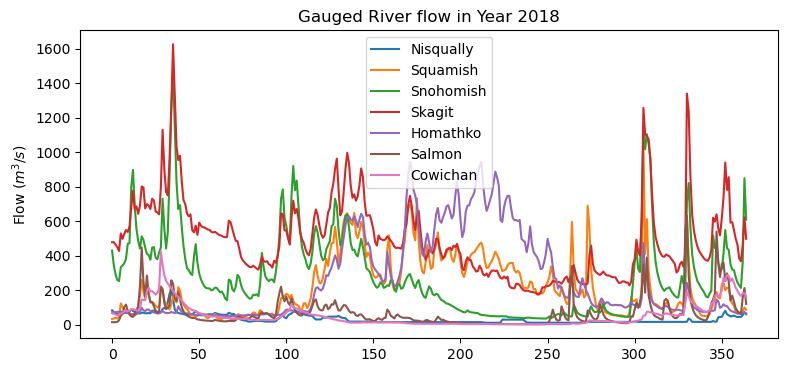

In [468]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Nisqually[Nisqually['YYYY'] == year]['DISCHARGE'])), Nisqually[Nisqually['YYYY'] == year]['DISCHARGE'], label='Nisqually')
ax.plot(range(len(Squamish[Squamish['YYYY'] == year]['DISCHARGE'])), Squamish[Squamish['YYYY'] == year]['DISCHARGE'], label='Squamish')
ax.plot(range(len(Snohomish[Snohomish['YYYY'] == year]['DISCHARGE'])), Snohomish[Snohomish['YYYY'] == year]['DISCHARGE'], label='Snohomish')
ax.plot(range(len(Skagit[Skagit['YYYY'] == year]['DISCHARGE'])), Skagit[Skagit['YYYY'] == year]['DISCHARGE'], label='Skagit')
ax.plot(range(len(Homathko[Homathko['YYYY'] == year]['DISCHARGE'])), Homathko[Homathko['YYYY'] == year]['DISCHARGE'], label='Homathko')
ax.plot(range(len(Salmon[Salmon['YYYY'] == year]['DISCHARGE'])), Salmon[Salmon['YYYY'] == year]['DISCHARGE'], label='Salmon')
ax.plot(range(len(Cowichan[Cowichan['YYYY'] == year]['DISCHARGE'])), Cowichan[Cowichan['YYYY'] == year]['DISCHARGE'], label='Cowichan')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Gauged River flow in Year ' + str(year))

plt.legend()

Text(0.5, 1.0, 'Nisqually guaged river flow avg over all data')

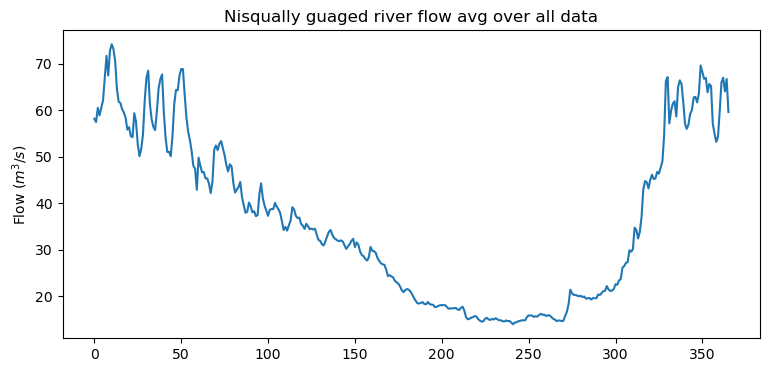

In [469]:
Nisqually_avg = Nisqually[['MM', 'DD', 'DISCHARGE']].groupby(by=['MM', 'DD']).mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Nisqually_avg['DISCHARGE'])), Nisqually_avg['DISCHARGE'])

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Nisqually guaged river flow avg over all data')

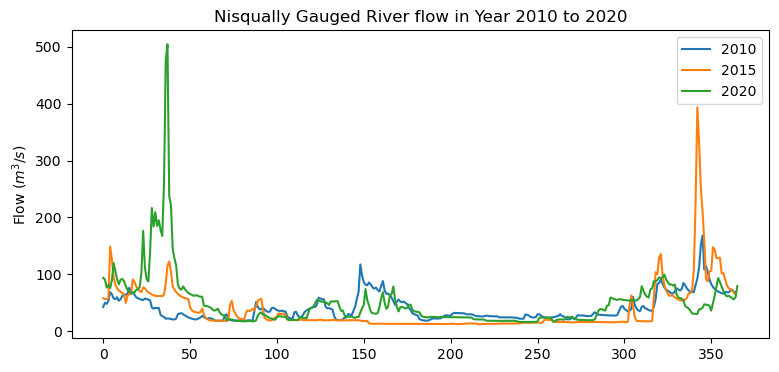

In [470]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))


ax.plot(range(len(Nisqually[Nisqually['YYYY'] == 2010]['DISCHARGE'])), Nisqually[Nisqually['YYYY'] == 2010]['DISCHARGE'], label='2010')
ax.plot(range(len(Nisqually[Nisqually['YYYY'] == 2015]['DateTime'])), Nisqually[Nisqually['YYYY'] == 2015]['DISCHARGE'], label='2015')
ax.plot(range(len(Nisqually[Nisqually['YYYY'] == 2020]['DateTime'])), Nisqually[Nisqually['YYYY'] == 2020]['DISCHARGE'], label='2020')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Nisqually Gauged River flow in Year 2010 to 2020')

plt.legend()

Text(0.5, 1.0, 'Squamish guaged river flow avg over all data')

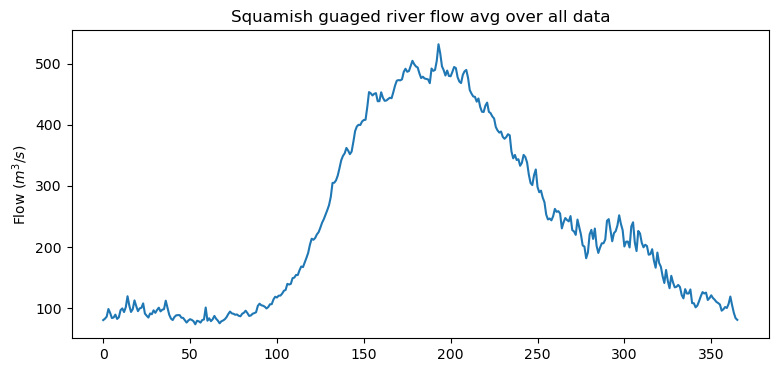

In [471]:
Squamish_avg = Squamish[['MM', 'DD', 'DISCHARGE']].groupby(by=['MM', 'DD']).mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Squamish_avg['DISCHARGE'])), Squamish_avg['DISCHARGE'])

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Squamish guaged river flow avg over all data')

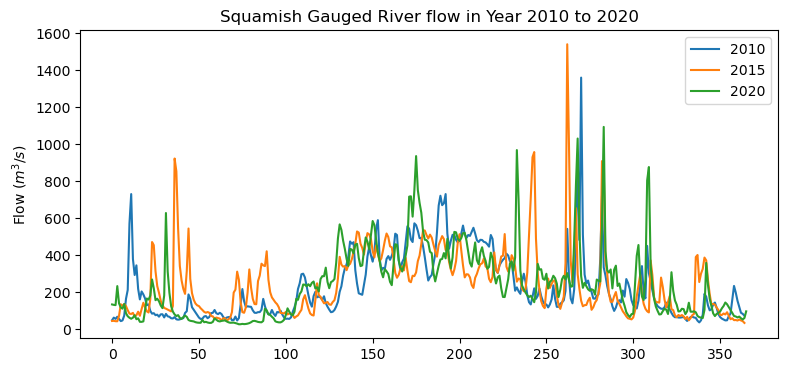

In [472]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Squamish[Squamish['YYYY'] == 2010]['DISCHARGE'])), Squamish[Squamish['YYYY'] == 2010]['DISCHARGE'], label='2010')
ax.plot(range(len(Squamish[Squamish['YYYY'] == 2015]['DateTime'])), Squamish[Squamish['YYYY'] == 2015]['DISCHARGE'], label='2015')
ax.plot(range(len(Squamish[Squamish['YYYY'] == 2020]['DateTime'])), Squamish[Squamish['YYYY'] == 2020]['DISCHARGE'], label='2020')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Squamish Gauged River flow in Year 2010 to 2020')

plt.legend()

Text(0.5, 1.0, 'Snohomish guaged river flow avg over all data')

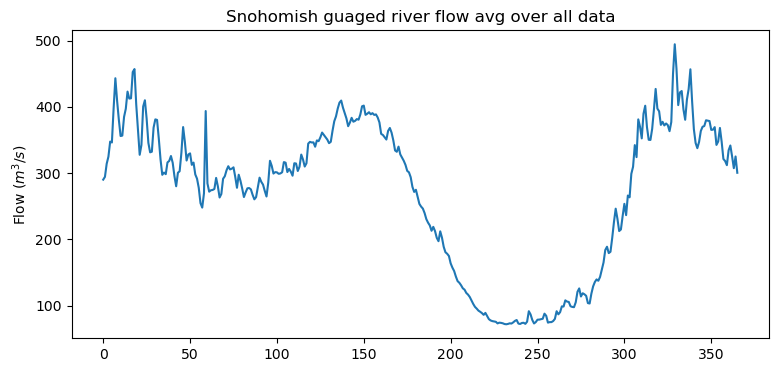

In [473]:
Snohomish_avg = Snohomish[['MM', 'DD', 'DISCHARGE']].groupby(by=['MM', 'DD']).mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Snohomish_avg['DISCHARGE'])), Snohomish_avg['DISCHARGE'])

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Snohomish guaged river flow avg over all data')

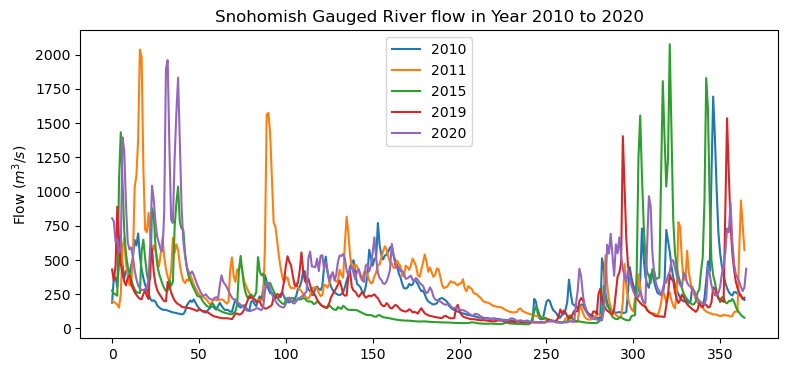

In [474]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))


ax.plot(range(len(Snohomish[Snohomish['YYYY'] == 2010]['DISCHARGE'])), Snohomish[Snohomish['YYYY'] == 2010]['DISCHARGE'], label='2010')
ax.plot(range(len(Snohomish[Snohomish['YYYY'] == 2011]['DISCHARGE'])), Snohomish[Snohomish['YYYY'] == 2011]['DISCHARGE'], label='2011')
# ax.plot(range(len(Snohomish[Snohomish['YYYY'] == 2012]['DISCHARGE'])), Snohomish[Snohomish['YYYY'] == 2012]['DISCHARGE'], label='2012')
# ax.plot(range(len(Snohomish[Snohomish['YYYY'] == 2013]['DISCHARGE'])), Snohomish[Snohomish['YYYY'] == 2013]['DISCHARGE'], label='2013')
# ax.plot(range(len(Snohomish[Snohomish['YYYY'] == 2014]['DISCHARGE'])), Snohomish[Snohomish['YYYY'] == 2014]['DISCHARGE'], label='2014')
ax.plot(range(len(Snohomish[Snohomish['YYYY'] == 2015]['DateTime'])), Snohomish[Snohomish['YYYY'] == 2015]['DISCHARGE'], label='2015')
# ax.plot(range(len(Snohomish[Snohomish['YYYY'] == 2016]['DISCHARGE'])), Snohomish[Snohomish['YYYY'] == 2016]['DISCHARGE'], label='2016')
# ax.plot(range(len(Snohomish[Snohomish['YYYY'] == 2017]['DISCHARGE'])), Snohomish[Snohomish['YYYY'] == 2017]['DISCHARGE'], label='2017')
# ax.plot(range(len(Snohomish[Snohomish['YYYY'] == 2018]['DISCHARGE'])), Snohomish[Snohomish['YYYY'] == 2018]['DISCHARGE'], label='2018')
ax.plot(range(len(Snohomish[Snohomish['YYYY'] == 2019]['DISCHARGE'])), Snohomish[Snohomish['YYYY'] == 2019]['DISCHARGE'], label='2019')
ax.plot(range(len(Snohomish[Snohomish['YYYY'] == 2020]['DateTime'])), Snohomish[Snohomish['YYYY'] == 2020]['DISCHARGE'], label='2020')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Snohomish Gauged River flow in Year 2010 to 2020')

plt.legend()

Text(0.5, 1.0, 'Skagit guaged river flow avg over all data')

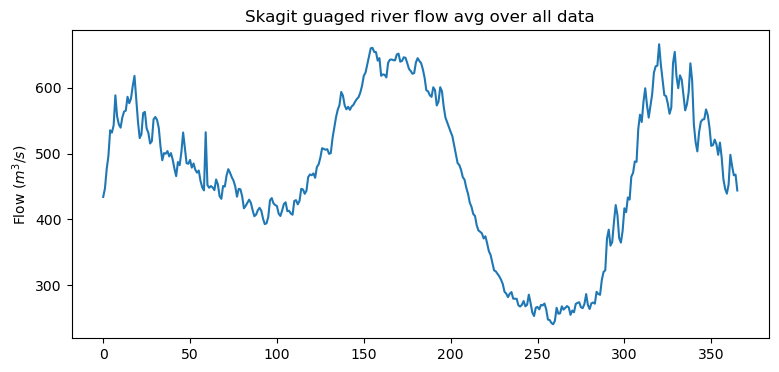

In [475]:
Skagit_avg = Skagit[['MM', 'DD', 'DISCHARGE']].groupby(by=['MM', 'DD']).mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Skagit_avg['DISCHARGE'])), Skagit_avg['DISCHARGE'])

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Skagit guaged river flow avg over all data')

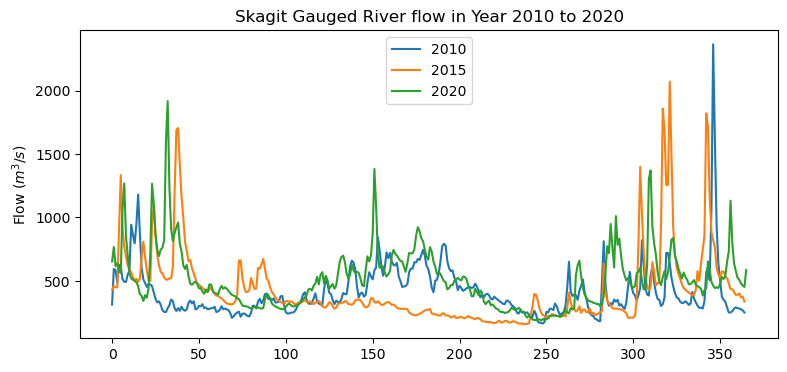

In [476]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))


ax.plot(range(len(Skagit[Skagit['YYYY'] == 2010]['DISCHARGE'])), Skagit[Skagit['YYYY'] == 2010]['DISCHARGE'], label='2010')
ax.plot(range(len(Skagit[Skagit['YYYY'] == 2015]['DateTime'])), Skagit[Skagit['YYYY'] == 2015]['DISCHARGE'], label='2015')
ax.plot(range(len(Skagit[Skagit['YYYY'] == 2020]['DateTime'])), Skagit[Skagit['YYYY'] == 2020]['DISCHARGE'], label='2020')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Skagit Gauged River flow in Year 2010 to 2020')

plt.legend()

Text(0.5, 1.0, 'Homathko guaged river flow avg over all data')

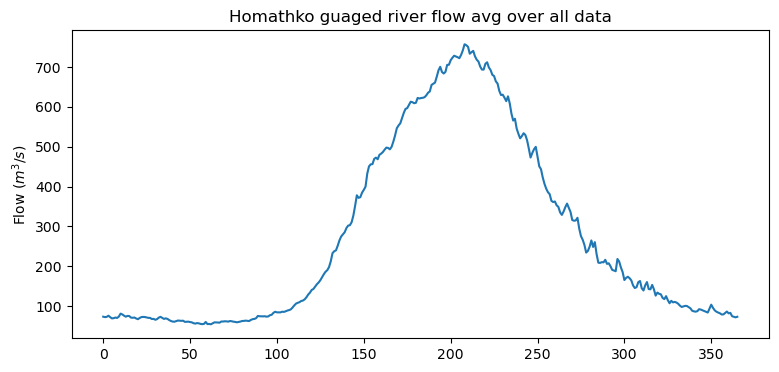

In [477]:
Homathko_avg = Homathko[['MM', 'DD', 'DISCHARGE']].groupby(by=['MM', 'DD']).mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Homathko_avg['DISCHARGE'])), Homathko_avg['DISCHARGE'])

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Homathko guaged river flow avg over all data')

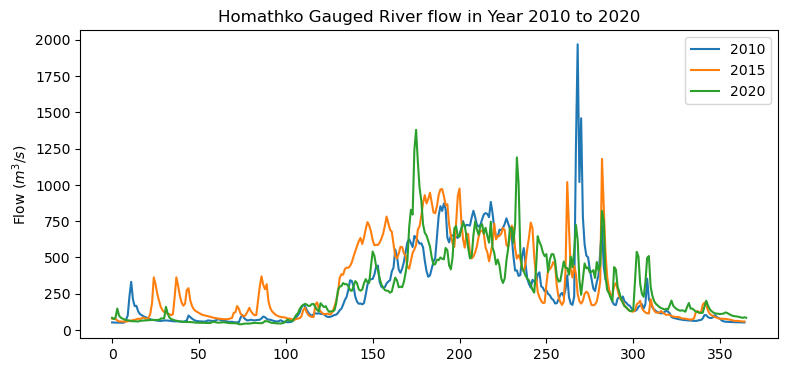

In [478]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))


ax.plot(range(len(Homathko[Homathko['YYYY'] == 2010]['DISCHARGE'])), Homathko[Homathko['YYYY'] == 2010]['DISCHARGE'], label='2010')
ax.plot(range(len(Homathko[Homathko['YYYY'] == 2015]['DateTime'])), Homathko[Homathko['YYYY'] == 2015]['DISCHARGE'], label='2015')
ax.plot(range(len(Homathko[Homathko['YYYY'] == 2020]['DateTime'])), Homathko[Homathko['YYYY'] == 2020]['DISCHARGE'], label='2020')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Homathko Gauged River flow in Year 2010 to 2020')

plt.legend()

Text(0.5, 1.0, 'Salmon guaged river flow avg over all data')

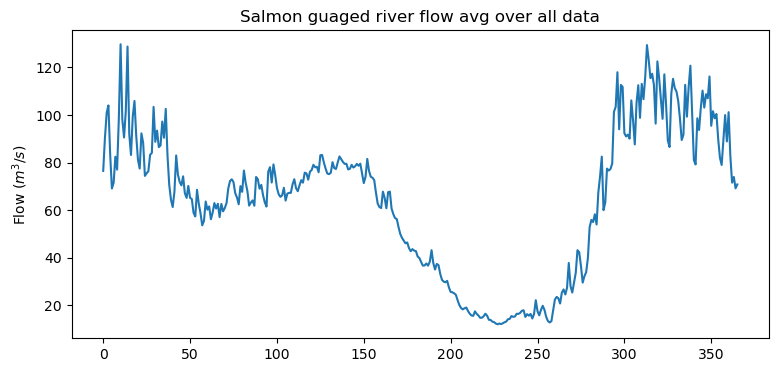

In [479]:
Salmon_avg = Salmon[['MM', 'DD', 'DISCHARGE']].groupby(by=['MM', 'DD']).mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Salmon_avg['DISCHARGE'])), Salmon_avg['DISCHARGE'])

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Salmon guaged river flow avg over all data')

Text(0.5, 1.0, 'Cowichan gauged river flow avg over all data')

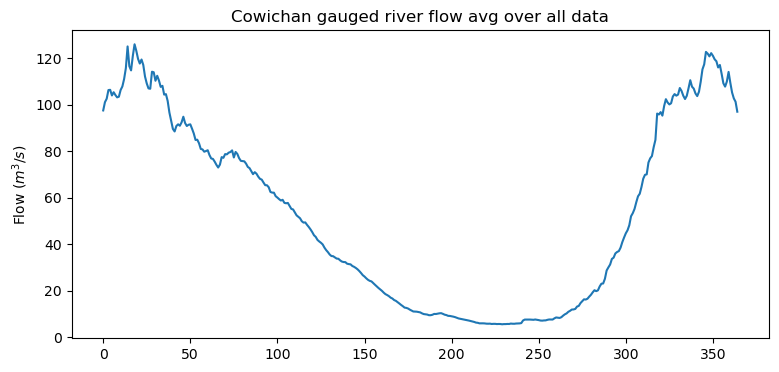

In [480]:
Cowichan_avg = Cowichan[['MM', 'DD', 'DISCHARGE']].groupby(by=['MM', 'DD']).mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Cowichan_avg['DISCHARGE'])), Cowichan_avg['DISCHARGE'])

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Cowichan gauged river flow avg over all data')

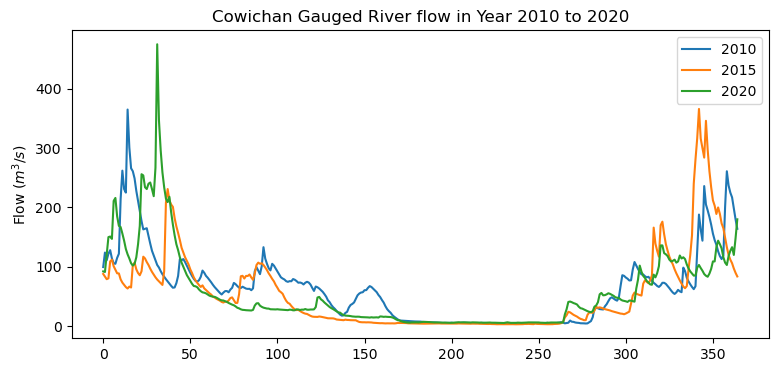

In [481]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))


ax.plot(range(len(Cowichan[Cowichan['YYYY'] == 2010]['DISCHARGE'])), Cowichan[Cowichan['YYYY'] == 2010]['DISCHARGE'], label='2010')
ax.plot(range(len(Cowichan[Cowichan['YYYY'] == 2015]['DISCHARGE'])), Cowichan[Cowichan['YYYY'] == 2015]['DISCHARGE'], label='2015')
ax.plot(range(len(Cowichan[Cowichan['YYYY'] == 2020]['DISCHARGE'])), Cowichan[Cowichan['YYYY'] == 2020]['DISCHARGE'], label='2020')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Cowichan Gauged River flow in Year 2010 to 2020')
ax.legend()

Text(0.5, 1.0, 'Cowichan_Lake gauged river flow avg over all data')

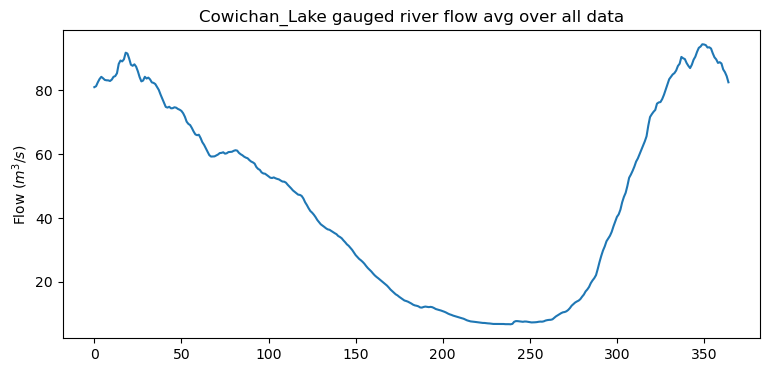

In [482]:
Cowichan_Lake_avg = Cowichan_Lake[['MM', 'DD', 'DISCHARGE']].groupby(by=['MM', 'DD']).mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Cowichan_Lake_avg['DISCHARGE'])), Cowichan_Lake_avg['DISCHARGE'])

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Cowichan_Lake gauged river flow avg over all data')

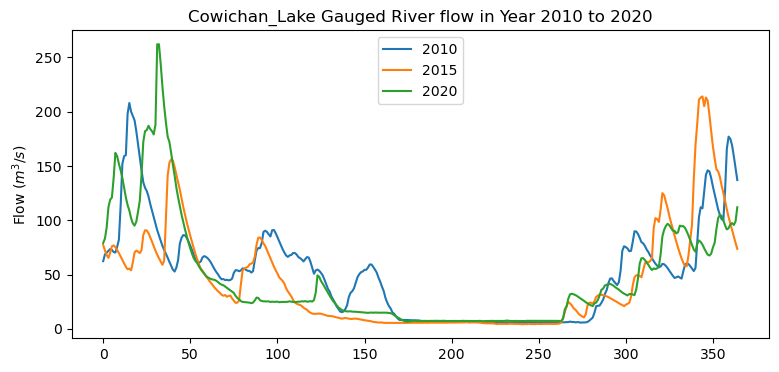

In [483]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))


ax.plot(range(len(Cowichan_Lake[Cowichan_Lake['YYYY'] == 2010]['DISCHARGE'])), Cowichan_Lake[Cowichan_Lake['YYYY'] == 2010]['DISCHARGE'], label='2010')
ax.plot(range(len(Cowichan_Lake[Cowichan_Lake['YYYY'] == 2015]['DISCHARGE'])), Cowichan_Lake[Cowichan_Lake['YYYY'] == 2015]['DISCHARGE'], label='2015')
ax.plot(range(len(Cowichan_Lake[Cowichan_Lake['YYYY'] == 2020]['DISCHARGE'])), Cowichan_Lake[Cowichan_Lake['YYYY'] == 2020]['DISCHARGE'], label='2020')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Cowichan_Lake Gauged River flow in Year 2010 to 2020')
ax.legend()

Text(0.5, 1.0, 'Fraser gauged river flow avg over all data')

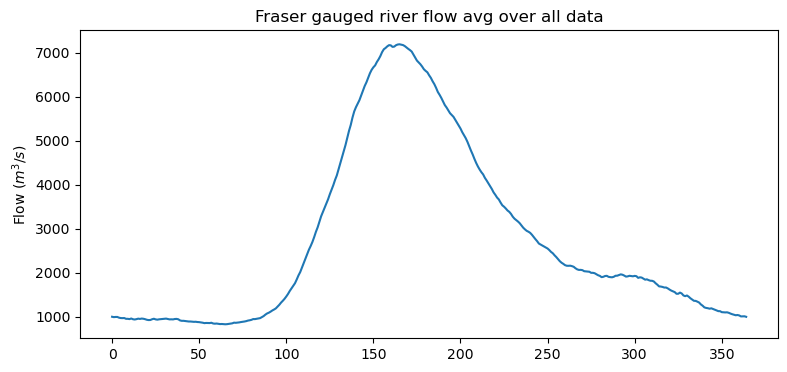

In [484]:
Fraser_avg = Fraser[['MM', 'DD', 'DISCHARGE']].groupby(by=['MM', 'DD']).mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Fraser_avg['DISCHARGE'])), Fraser_avg['DISCHARGE'])

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Fraser gauged river flow avg over all data')

Text(0.5, 1.0, 'Elwha gauged river flow avg over all data')

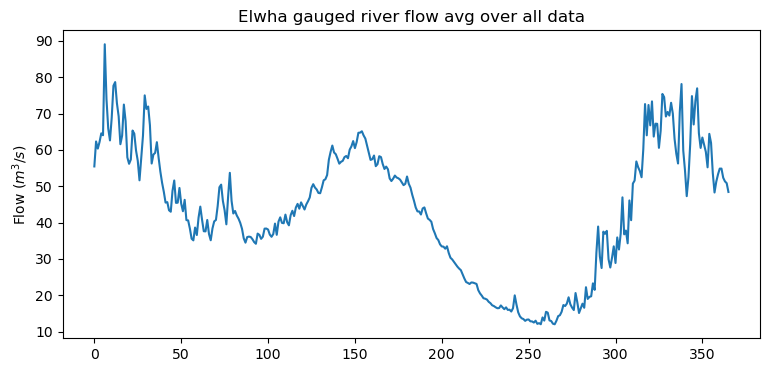

In [485]:
Elwha_avg = Elwha[['MM', 'DD', 'DISCHARGE']].groupby(by=['MM', 'DD']).mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Elwha_avg['DISCHARGE'])), Elwha_avg['DISCHARGE'])

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Elwha gauged river flow avg over all data')

Text(0.5, 1.0, 'Elwha Gauged River flow in Year 2010 to 2020')

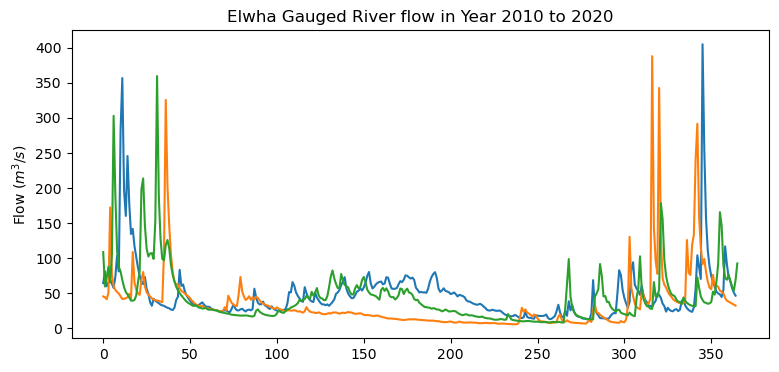

In [486]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))


ax.plot(range(len(Elwha[Elwha['YYYY'] == '2010']['DISCHARGE'])), Elwha[Elwha['YYYY'] == '2010']['DISCHARGE'], label='2010')
ax.plot(range(len(Elwha[Elwha['YYYY'] == '2015']['DISCHARGE'])), Elwha[Elwha['YYYY'] == '2015']['DISCHARGE'], label='2015')
ax.plot(range(len(Elwha[Elwha['YYYY'] == '2020']['DISCHARGE'])), Elwha[Elwha['YYYY'] == '2020']['DISCHARGE'], label='2020')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Elwha Gauged River flow in Year 2010 to 2020')

Text(0.5, 1.0, 'Nooksack gauged river flow avg over all data')

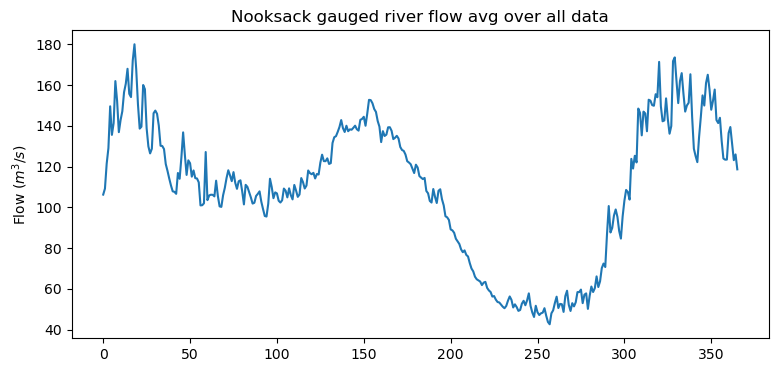

In [487]:
Nooksack_avg = Nooksack[['MM', 'DD', 'DISCHARGE']].groupby(by=['MM', 'DD']).mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Nooksack_avg['DISCHARGE'])), Nooksack_avg['DISCHARGE'])

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Nooksack gauged river flow avg over all data')

Text(0.5, 1.0, 'Nooksack Gauged River flow in Year 2010 to 2020')

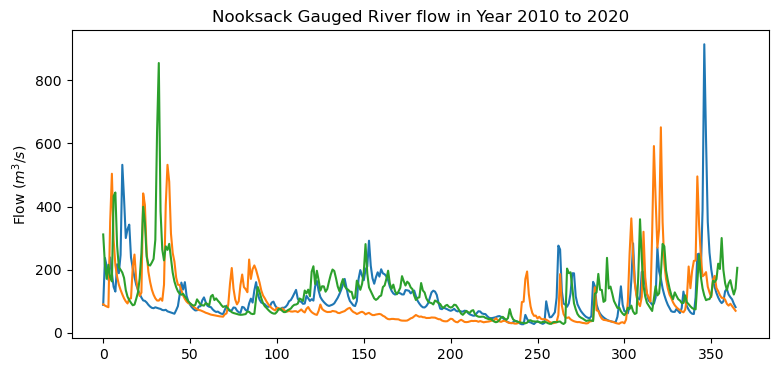

In [488]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))


ax.plot(range(len(Nooksack[Nooksack['YYYY'] == '2010']['DISCHARGE'])), Nooksack[Nooksack['YYYY'] == '2010']['DISCHARGE'], label='2010')
ax.plot(range(len(Nooksack[Nooksack['YYYY'] == '2015']['DISCHARGE'])), Nooksack[Nooksack['YYYY'] == '2015']['DISCHARGE'], label='2015')
ax.plot(range(len(Nooksack[Nooksack['YYYY'] == '2020']['DISCHARGE'])), Nooksack[Nooksack['YYYY'] == '2020']['DISCHARGE'], label='2020')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Nooksack Gauged River flow in Year 2010 to 2020')

Text(0.5, 1.0, 'Salmon Gauged River flow in Year 2010 to 2020')

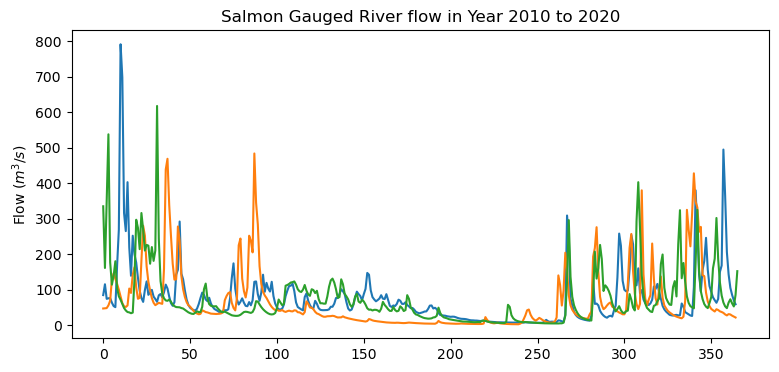

In [489]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))


ax.plot(range(len(Salmon[Salmon['YYYY'] == 2010]['DISCHARGE'])), Salmon[Salmon['YYYY'] == 2010]['DISCHARGE'], label='2010')
ax.plot(range(len(Salmon[Salmon['YYYY'] == 2015]['DateTime'])), Salmon[Salmon['YYYY'] == 2015]['DISCHARGE'], label='2015')
ax.plot(range(len(Salmon[Salmon['YYYY'] == 2020]['DateTime'])), Salmon[Salmon['YYYY'] == 2020]['DISCHARGE'], label='2020')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Salmon Gauged River flow in Year 2010 to 2020')

Text(0.5, 1.0, 'Hydrographs captured in mode 1 of PCA')

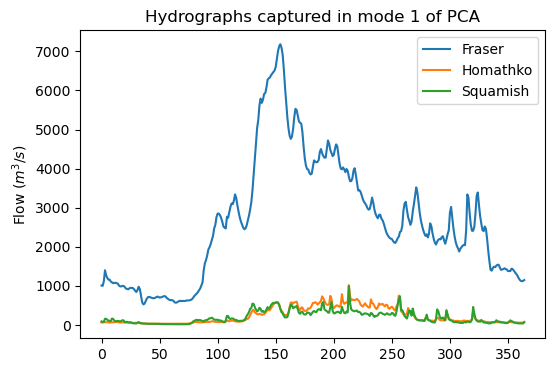

In [490]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))


ax.plot(range(len(Fraser[Fraser['YYYY'] == 2019]['DISCHARGE'])), Fraser[Fraser['YYYY'] == 2019]['DISCHARGE'], label='Fraser')
ax.plot(range(len(Homathko[Homathko['YYYY'] == 2019]['DateTime'])), Homathko[Homathko['YYYY'] == 2019]['DISCHARGE'], label='Homathko')
ax.plot(range(len(Squamish[Squamish['YYYY'] == 2019]['DateTime'])), Squamish[Squamish['YYYY'] == 2019]['DISCHARGE'], label='Squamish')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.legend()
ax.set_title('Hydrographs captured in mode 1 of PCA')

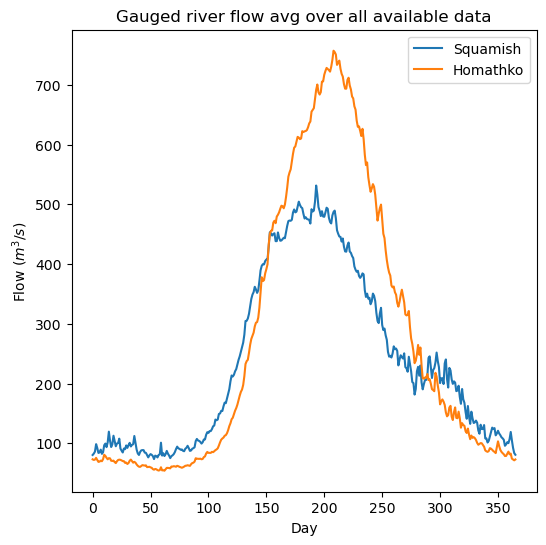

In [504]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# rainfall
# ax.plot(range(len(Nisqually_avg['DISCHARGE'])), Nisqually_avg['DISCHARGE'], label='Nisqually')
# ax.plot(range(len(Cowichan_avg['DISCHARGE'])), Cowichan_avg['DISCHARGE'], label='Cowichan')

# mixed
# ax.plot(range(len(Snohomish_avg['DISCHARGE'])), Snohomish_avg['DISCHARGE'], label='Snohomish')
# ax.plot(range(len(Skagit_avg['DISCHARGE'])), Skagit_avg['DISCHARGE'], label='Skagit')
# ax.plot(range(len(Salmon_avg['DISCHARGE'])), Salmon_avg['DISCHARGE'], label='Salmon')
# ax.plot(range(len(Elwha_avg['DISCHARGE'])), Elwha_avg['DISCHARGE'], label='Elwha')
# ax.plot(range(len(Nooksack_avg['DISCHARGE'])), Nooksack_avg['DISCHARGE'], label='Nooksack')

# glacial
ax.plot(range(len(Squamish_avg['DISCHARGE'])), Squamish_avg['DISCHARGE'], label='Squamish')
ax.plot(range(len(Homathko_avg['DISCHARGE'])), Homathko_avg['DISCHARGE'], label='Homathko')
# ax.plot(range(len(Fraser_avg['DISCHARGE'])), Fraser_avg['DISCHARGE'], label='Fraser')


ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_xlabel('Day')
ax.set_title('Gauged river flow avg over all available data')

plt.legend()

## Map the classification scheme

In [509]:
import salishsea_tools.river_202108 as rivers

In [513]:
bathymetry = xr.open_dataset('../../../../MEOPAR/grid/bathymetry_202108.nc')
runoff = xr.open_dataset('../../../../../../results/forcing/rivers/R201702DFraCElse_y2023m01d19.nc')

In [536]:
def plot_head(w_shed, r_call, r_name, color, size, label):
    ax.scatter(rivers.prop_dict[w_shed][r_call]['j'], rivers.prop_dict[w_shed][r_call]['i'], s=size, color=color,alpha=1,edgecolors='k',label=label)
    ax.text(rivers.prop_dict[w_shed][r_call]['j']+10, rivers.prop_dict[w_shed][r_call]['i'],r_name)
    print(r_name + ' (i, j): (' + str(rivers.prop_dict[w_shed][r_call]['i']) + ', ' + str(rivers.prop_dict[w_shed][r_call]['j']) + ')')

In [526]:
np.mean(Fraser_avg['DISCHARGE'])

2729.408245684189

Nisqually (i, j): (1, 135)
Cowichan (i, j): (383, 201)
Snohomish (i, j): (138, 311)
Skagit (i, j): (213, 313)
Salmon (i, j): (865, 64)
Elwha (i, j): (261, 134)
Nooksack (i, j): (308, 356)
Fraser (i, j): (500, 394)
Squamish (i, j): (534, 384)
Homathko (i, j): (896, 293)


(-30.0, 928.0)

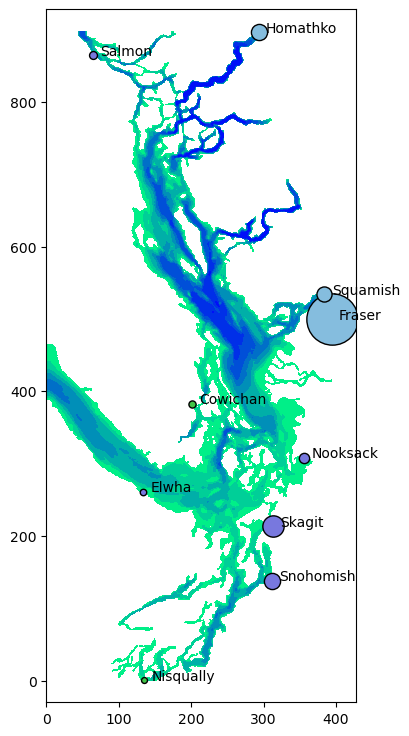

In [546]:
imin, imax = 0, 898
jmin, jmax = 0, 398
jj = range(jmax)
ii = range(imax)
jjm, iim = np.meshgrid(jj, ii)
fluxarray = np.array(runoff.rorunoff[0, :, :jmax])
fig, ax = plt.subplots(1, 1, figsize=(4, 9))
ax.contourf(bathymetry.Bathymetry[:, :jmax], cmap='winter_r')
      
# ax.scatter(jjm[fluxarray>0], iim[fluxarray>0], s=fluxarray[fluxarray>0]*1000, color='tab:red',alpha=0.5)

# rainfall
plot_head('puget','NisquallyMcAllister','Nisqually', '#41c447', np.mean(Nisqually_avg['DISCHARGE'])/2, 'rainfall')
plot_head('evi_s','Cowichan1','Cowichan', '#41c447', np.mean(Cowichan_avg['DISCHARGE'])/2, 'rainfall')  # others

# mixed
plot_head('skagit','SnohomishAllenQuilceda','Snohomish', '#7878de', np.mean(Snohomish_avg['DISCHARGE'])/2, 'mixed')
plot_head('skagit','Skagit1','Skagit', '#7878de', np.mean(Skagit_avg['DISCHARGE'])/2, 'mixed')  # others
plot_head('evi_n','SalmonSayward','Salmon', '#7878de', np.mean(Salmon_avg['DISCHARGE'])/2, 'mixed')
plot_head('jdf','Elwha','Elwha', '#7878de', np.mean(Elwha_avg['DISCHARGE'])/2, 'mixed')
plot_head('fraser','Nooksack','Nooksack', '#7878de', np.mean(Nooksack_avg['DISCHARGE'])/2, 'mixed')  # others

# glacial
plot_head('fraser','Fraser','Fraser', '#85bdde', np.mean(Fraser_avg['DISCHARGE'])/2, 'glacial')
plot_head('howe','Squamish','Squamish', '#85bdde', np.mean(Squamish_avg['DISCHARGE'])/2, 'glacial')
plot_head('bute','Homathko','Homathko', '#85bdde', np.mean(Homathko_avg['DISCHARGE'])/2, 'glacial')

# ax.legend()
ax.set_xlim(jmin, jmax+30)
ax.set_ylim(imin-30, imax+30)


Text(0.5, 1.0, 'River Discharge: Jan 19th, 2023')

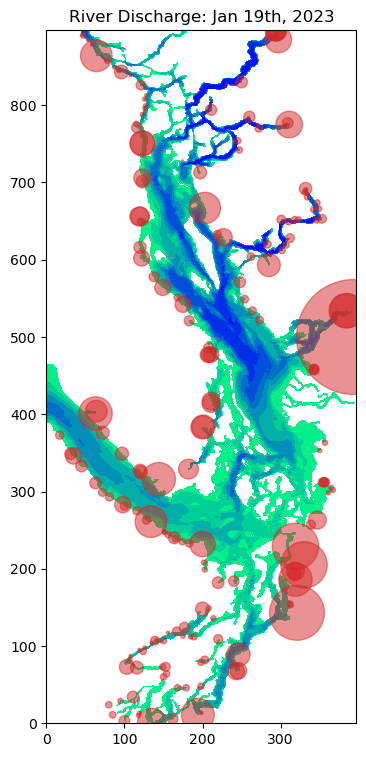

In [548]:
imin, imax = 0, 898
jmin, jmax = 0, 398
jj = range(jmax)
ii = range(imax)
jjm, iim = np.meshgrid(jj, ii)
fluxarray = np.array(runoff.rorunoff[0, :, :jmax])
fig, ax = plt.subplots(1, 1, figsize=(4, 9))
ax.contourf(bathymetry.Bathymetry[:, :jmax], cmap='winter_r')
      
ax.scatter(jjm[fluxarray>0], iim[fluxarray>0], s=fluxarray[fluxarray>0]*1000, color='tab:red',alpha=0.5)
ax.set_title('River Discharge: Jan 19th, 2023')

## Look at dailies rivers

In [ ]:
import salishsea_tools.river_202108 as rivers

In [ ]:
year_dailies_path = '../../../../../../results/forcing/rivers/R202108Dailies_y' + str(year) + '*.nc'
year_dailies_list = sorted(glob.glob(year_dailies_path))

In [ ]:
# year_field = xr.open_dataset(year_dailies_list[0]).rorunoff[0,:,:]

# for daily in year_dailies_list:
#     day_field = xr.open_dataset(daily).rorunoff[0,:,:]

#     year_field = np.dstack([year_field, day_field])

In [ ]:
# year_field  # need to remove first element
# year_field_fin = np.delete(year_field, 0, axis=2)

In [ ]:
# # write a function that accepts a year field, a watershed, and a river name and creates a timeseries

# def ts_from_dai(w_shed, r_call, data_field):
#     return data_field[rivers.prop_dict[w_shed][r_call]['i'], rivers.prop_dict[w_shed][r_call]['j'], :]

In [ ]:
# Nisqually_dai = ts_from_dai('puget','NisquallyMcAllister',year_field_fin)
# Squamish_dai = ts_from_dai('howe','Squamish',year_field_fin)
# Homathko_dai = ts_from_dai('bute','Homathko',year_field_fin)
# Elwha_dai = ts_from_dai('jdf','Elwha',year_field_fin)
# Nanaimo_dai = ts_from_dai('evi_s','Nanaimo1',year_field_fin)  # others
# Cowichan_dai = ts_from_dai('evi_s','Cowichan1',year_field_fin)  # others
# Stillaguamish_dai = ts_from_dai('skagit','Stillaguamish1',year_field_fin)  # others
# Puyallup_dai = ts_from_dai('puget','Puyallup',year_field_fin)
# Campbell_dai = ts_from_dai('fraser','LittleCampbell',year_field_fin)
# Nooksack_dai = ts_from_dai('fraser','Nooksack',year_field_fin)  # others
# Snohomish_dai = ts_from_dai('skagit','SnohomishAllenQuilceda',year_field_fin)
# Skagit_dai = ts_from_dai('skagit','Skagit1',year_field_fin)  # others
# Salmon_dai = ts_from_dai('evi_n','SalmonSayward',year_field_fin)

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(9, 4))

# ax.plot(Nisqually_dai, linewidth = 1.5,label='Nisqually')
# ax.plot(Squamish_dai, linewidth = 1.5,label='Squamish')
# ax.plot(Homathko_dai, linewidth = 1.5,label='Homathko')
# ax.plot(Elwha_dai, linewidth = 1.5,label='Elwha')
# ax.plot(Nanaimo_dai, linewidth = 1.5,label='Nanaimo')
# ax.plot(Cowichan_dai, linewidth = 1.5,label='Cowichan')
# ax.plot(Stillaguamish_dai, linewidth = 1.5,label='Stillaguamish')
# ax.plot(Puyallup_dai, linewidth = 1.5,label='Puyallup')
# ax.plot(Campbell_dai, linewidth = 1.5,label='Campbell')
# ax.plot(Nooksack_dai, linewidth = 1.5,linestyle='--',label='Nooksack')
# ax.plot(Snohomish_dai, linewidth = 1.5,linestyle='--',label='Snohomish')
# ax.plot(Skagit_dai, linewidth = 1.5,linestyle='--',label='Skagit')
# ax.plot(Salmon_dai, linewidth = 1.5,linestyle='--',label='Salmon')

# ax.legend()

## Compute yearly avg for certain rivers

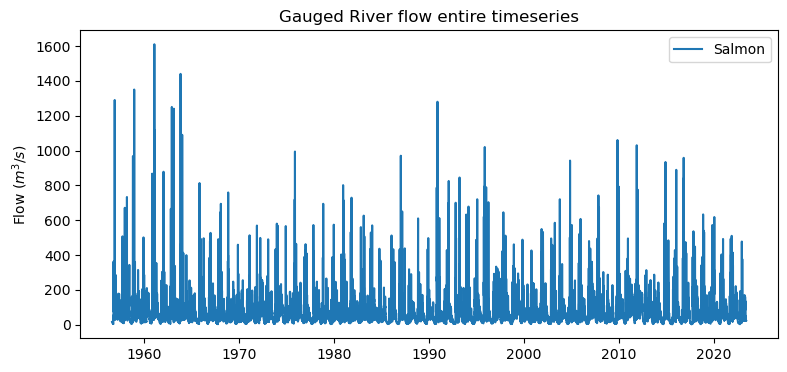

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(Salmon['DateTime'], Salmon['DISCHARGE'], label='Salmon')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Gauged River flow entire timeseries')

plt.legend()

In [ ]:
np.mean(Salmon.groupby(['YYYY']).mean()['DISCHARGE'].values)

/tmp/ipykernel_478252/1672688322.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  np.mean(Salmon.groupby(['YYYY']).mean()['DISCHARGE'].values)


64.70699679454607

/tmp/ipykernel_478252/3202137495.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Salmon.groupby(['YYYY']).mean()
/tmp/ipykernel_478252/3202137495.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax.plot(Salmon.groupby(['YYYY']).mean()['DISCHARGE'], label='Salmon')


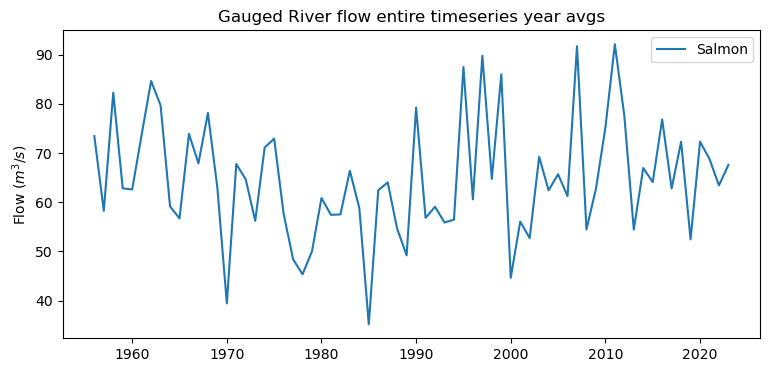

In [ ]:
Salmon.groupby(['YYYY']).mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(Salmon.groupby(['YYYY']).mean()['DISCHARGE'], label='Salmon')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Gauged River flow entire timeseries year avgs')

plt.legend()